In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


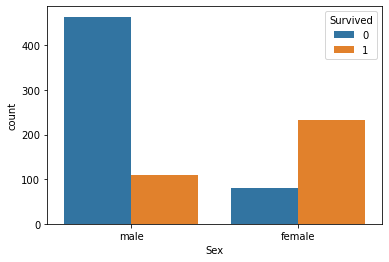

In [9]:
sns.countplot(x = 'Sex', hue ='Survived', data = df)

In [10]:
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

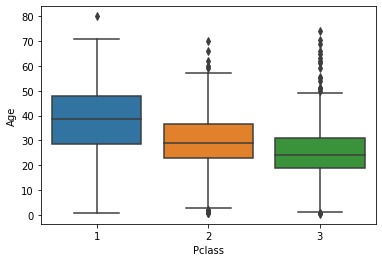

In [11]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df)

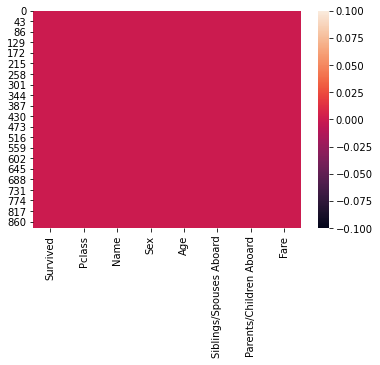

In [12]:
sns.heatmap(df.isnull())

In [13]:
gender = pd.get_dummies(df['Sex'], drop_first = True)
new_data = pd.concat([df['Survived'], df['Pclass'], gender], axis = 1)
new_data.head()

,Survived,Pclass,male
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [15]:
x = new_data.drop('Survived', axis = 1)
y = new_data['Survived']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X = scaler.fit_transform(x)
X

array([[ 0.83052363,  0.74026551],
       [-1.56127657, -1.35086667],
       [ 0.83052363, -1.35086667],
       ...,
       [ 0.83052363, -1.35086667],
       [-1.56127657,  0.74026551],
       [ 0.83052363,  0.74026551]])

In [29]:
from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, text_size = 0.3, random_state = 4 )
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 1 )

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import classification_report
classification_report(Y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.82      0.82       162\n           1       0.72      0.70      0.71       105\n\n    accuracy                           0.78       267\n   macro avg       0.76      0.76      0.76       267\nweighted avg       0.77      0.78      0.77       267\n'

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.7752808988764045

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[133,  29],
       [ 31,  74]], dtype=int64)